# Графики в полулогарифмических и двойных логарифмических координатах. Расчет производной

Материалы курсов "Исследования скважин и пластов" и "Гидродинамические исследования скважин" в РГУ нефти и газа имени И.М.Губкина.

Хабибуллин Ринат 2021 г.

версия 0.2 от 22.09.2021

При анализе гидродинамических исследований широко используются графики в полулогарифмических и двойных логарифмических координатах. Также часто возникает необходимость расчета производных и отображение их на графиках. Разберем технические вопросы построения таких графиков с использованием `matplotlib`.

Для примера будем использовать решение линейного стока построенное ранее (смотри предыдущие тетрадки).


In [1]:
import numpy as np
import scipy.special as sc

# matplotlib используем для построения графиков
import matplotlib.pyplot as plt

In [2]:
# Решение линейного стока уравнения фильтрации
def pd_ei(rd, td):
  return -1/2*sc.expi(-rd**2 / 4 / td)

# График в обычных координатах

Нас будут интересовать как графики от расстояния, так и графики от времени. 
Мы можем нарисовать оба графика одновременно с использованием `matplotlib`

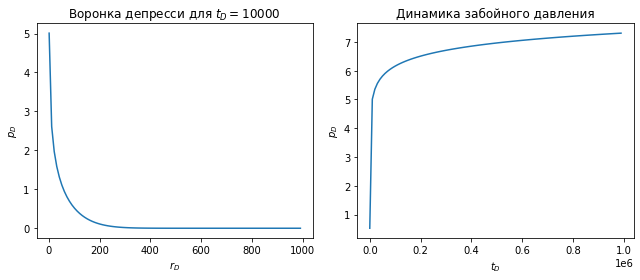

In [3]:
# задаем параметры для отрисовки отдельных графиков
td = 10000
rd = 1
# задаем массивы для отрисовки графиков - количество точек на графике
rr = np.arange(1, 1000, 10)
tt = np.arange(1, 1e6, 1e4)

# корректируем размер графика, чтобы было побольше 
plt.rcParams['figure.figsize'] = [9, 4]

# создаем фигуру с двумя графиками, на котором все будет отрисовываться
fig, (ax1, ax2) = plt.subplots(1,2)

# задаем первый график используя оси ax1
ax1.plot(rr, pd_ei(rr,td) )
ax1.set(title="Воронка депресси для $t_D= {}$".format(td))
ax1.set_xlabel("$r_D$")
ax1.set_ylabel("$p_D$")

# задаем первый график используя оси ax2
ax2.plot(tt, pd_ei(rd,tt) )
ax2.set(title="Динамика забойного давления")
ax2.set_xlabel("$t_D$")
ax2.set_ylabel("$p_D$")

fig.tight_layout()
plt.show()

# График в полулогарифмических координатах

Графики похожие на логарифм при отображении в полулогарифмических координатах превращаются в прямую линию. Поэтому эти графики пользуются популярностью при анализе гидродинамических исследований.

Полулогарифмические координаты легко настраиваются всеми распространенными пакетами отображения. Ниже пример для `matplotlib`.

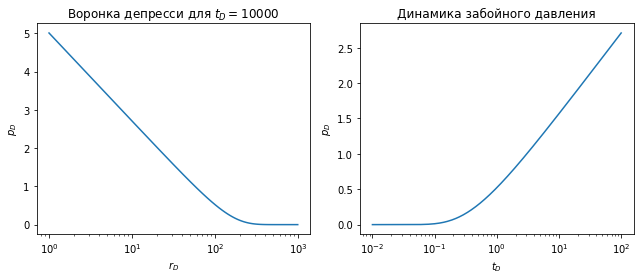

In [8]:
# задаем параметры для отрисовки отдельных графиков
td = 10000
rd = 1
# задаем массивы для отрисовки графиков - количество точек на графике
rr = np.arange(1, 1000, 10)
tt = np.arange(0.01, 1e2, 1e-2)

# корректируем размер графика, чтобы было побольше 
plt.rcParams['figure.figsize'] = [9, 4]

# создаем фигуру с двумя графиками, на котором все будет отрисовываться
fig, (ax1, ax2) = plt.subplots(1,2)

# задаем первый график используя оси ax1
ax1.plot(rr, pd_ei(rr,td) )
ax1.set(title="Воронка депресси для $t_D= {}$".format(td))
ax1.set_xlabel("$r_D$")
ax1.set_ylabel("$p_D$")
ax1.set_xscale('log')

# задаем первый график используя оси ax2
ax2.plot(tt, pd_ei(rd,tt) )
ax2.set(title="Динамика забойного давления")
ax2.set_xlabel("$t_D$")
ax2.set_ylabel("$p_D$")
ax2.set_xscale('log')

fig.tight_layout()
plt.show()



# График в двойных логарифмических координатах

Графики в двойных логарифмических координатах также весьма популярны при интерпретации гидродинамической модели. 

Такие графики обладают несколькими полезными свойствами. 
1. Степенные зависимости будут переводиться в прямые линии. Функция вида
$y=x^a$ при логарифмировании обоих частей равенства преобразуется к виду $ln(y) = a \cdot ln(x)$, что соответствует прямой линии на лог-лог графике с наклом $a$.
2. Зависимости вида $y = a \cdot f(b \cdot x)$ преобразуется при логарифмировании к виду $ln(y) = ln(a) + ln(f(e^{ln(b) + ln(x)})) $ или $ln(y) = ln(a) + g({ln(b) + ln(x)}) $ где $g(z) = ln(f(e^z))$. Таким образом для произвольной функции при отображении ее в лог-лог координатах множители аргумента и самой функции превращаются в сдвиги некоторой функции $g$, которая остается неизменной. За счет этого сравнивая разные изображения функций отличающихся множителями - их можно вычислить определяя величины сдвигов. 

Ниже приведен пример отображения графиков степенных функций в обычных и двойных логарифмических координатах

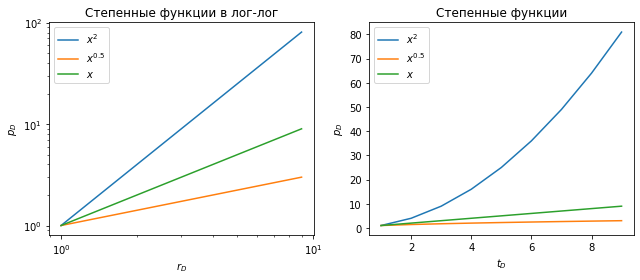

In [5]:

# задаем массивы для отрисовки графиков - количество точек на графике
rr = np.arange(1, 10, 1)

# корректируем размер графика, чтобы было побольше 
plt.rcParams['figure.figsize'] = [9, 4]

# создаем фигуру с двумя графиками, на котором все будет отрисовываться
fig, (ax1, ax2) = plt.subplots(1,2)

# задаем первый график используя оси ax1
ax1.plot(rr, rr**2 , label = '$x^2$')
ax1.plot(rr, rr**0.5, label = '$x^{0.5}$' )
ax1.plot(rr, rr**1, label = '$x$' )
ax1.set(title="Степенные функции в лог-лог")
ax1.set_xlabel("$r_D$")
ax1.set_ylabel("$p_D$")
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend()


# задаем первый график используя оси ax2
ax2.plot(rr, rr**2, label = '$x^2$')
ax2.plot(rr, rr**0.5, label = '$x^{0.5}$' )
ax2.plot(rr, rr**1, label = '$x$' )
ax2.set(title="Степенные функции")
ax2.set_xlabel("$t_D$")
ax2.set_ylabel("$p_D$")
ax2.legend()

fig.tight_layout()
plt.show()


Было бы полезно тут привести пример для определения сдвигов!

# Расчет и отображение значений производной функции заданной по точкам

Численные расчет производной несложен - например расчет методом конечных разностей. При использовании `numpy` массивов можно воспользоваться функцией `numpy.diff`. Тут надо учитывать, что длина массива после дифференцирования будет меньше при использовании функции `numpy.diff`.

При дифференцировании реальных данных полезно помнить, что операция численного дифференцирования может оказаться неустойчивой. В таких случаях необходимо применять разные виды фильтрации данных и стараться использовать более устойчивые алгоритмы численного дифференцирования (центральные разности с большим шагом и т.п.)

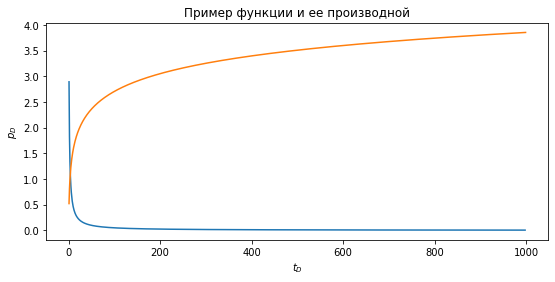

In [9]:
td = np.arange(1, 1000, 1)
rr = 1

plt.plot(td[:-1], np.diff(pd_ei(rr,td))*10)
plt.plot(td, pd_ei(rr,td) )

plt.title("Пример функции и ее производной")
plt.xlabel("$t_D$")
plt.ylabel("$p_D$")
plt.show()

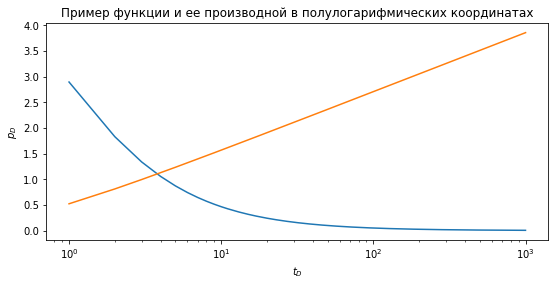

In [7]:
td = np.arange(1, 1000, 1)
rr = 1

plt.plot(td[:-1], np.diff(pd_ei(rr,td))*10)
plt.plot(td, pd_ei(rr,td) )

plt.title("Пример функции и ее производной в полулогарифмических координатах")
plt.xlabel("$t_D$")
plt.ylabel("$p_D$")

plt.xscale('log')

plt.show()

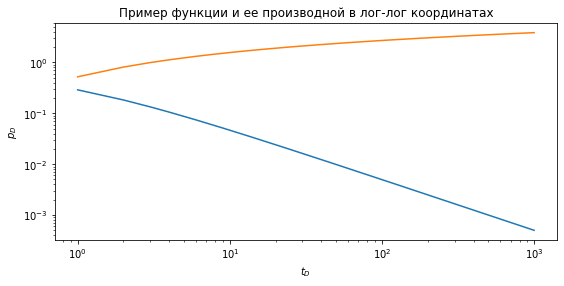

In [8]:
td = np.arange(1, 1000, 1)
rr = 1

plt.plot(td[:-1], np.diff(pd_ei(rr,td)))
plt.plot(td, pd_ei(rr,td) )

plt.title("Пример функции и ее производной в лог-лог координатах")
plt.xlabel("$t_D$")
plt.ylabel("$p_D$")

plt.xscale('log')
plt.yscale('log')

plt.show()

При интерпретации гидродинамических исследований скважин часто используют логарифмическую производную давления. 

$$\frac{dP}{d\ln t} = t\frac{dP}{d t}$$

построим график логарифмической производной перепада давления


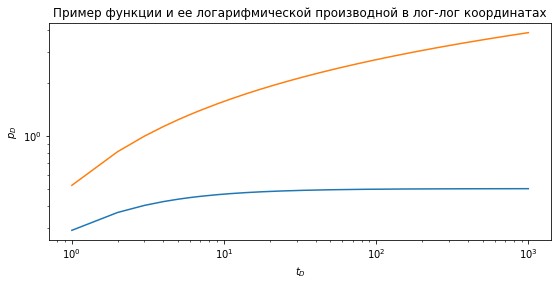

In [9]:
td = np.arange(1, 1000, 1)
rr = 1

plt.plot(td[:-1], np.diff(pd_ei(rr,td))*td[:-1])
plt.plot(td, pd_ei(rr,td) )

plt.title("Пример функции и ее логарифмической производной в лог-лог координатах")
plt.xlabel("$t_D$")
plt.ylabel("$p_D$")

plt.xscale('log')
plt.yscale('log')

plt.show()

Последний график представляет особый интерес для интерпретации гидродинамических исследований. Попробуйте ответить на вопрос - почему график логарифмической производной (почему это график логарифмической производной?) выглядит как прямая линии с нулевым наклоном для больших значений времен?